In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

2025-09-20 19:23:16.540728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758396196.870418      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758396196.963748      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## keras.datasets.mnist
MNIST is a famous dataset of handwritten digits (0 through 9).

It has 70,000 grayscale images, each of size 28×28 pixels.

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

displays a 2D array as a matrix, automatically applying a color map.

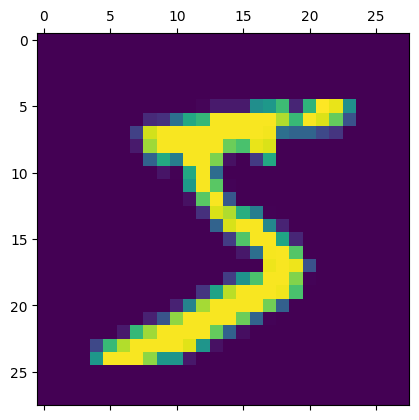

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

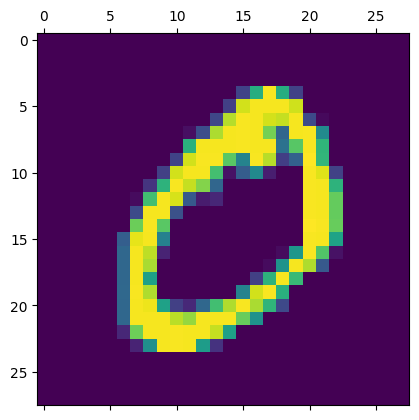

In [9]:
plt.matshow(X_train[1])

In [10]:
y_train[1]

0

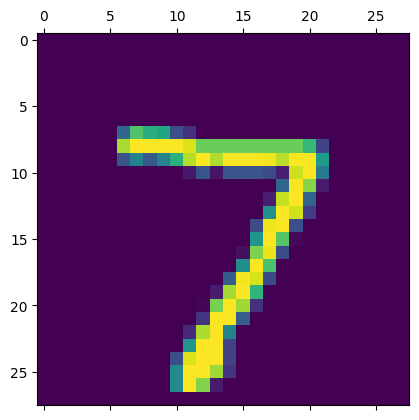

In [11]:
plt.matshow(X_test[0])

In [12]:
y_test[0]

7

Dividing by 255 converts them to values in the range 0–1 (floating point).

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
print(X_train[0].min(), X_train[0].max())


0.0 1.0


In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

way to flatten your images for a dense neural network.

In [16]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened.shape

(60000, 784)

## neural network for MNIST.

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-20 19:23:37.980898: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8103 - loss: 0.7309
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9128 - loss: 0.3082
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9255 - loss: 0.2663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9253 - loss: 0.2640
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9295 - loss: 0.2586
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9267 - loss: 0.2670
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9300 - loss: 0.2490
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9291 - loss: 0.2576
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9315 - loss: 0.2477


In [19]:
loss, accuracy = model.evaluate(X_test_flattened, y_test)
print('test loss:', loss)
print('accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9137 - loss: 0.3027
test loss: 0.26846563816070557
accuracy: 0.925599992275238


## Predicting with Keras

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([3.8760188e-03, 1.5124986e-08, 1.1491462e-02, 9.6682107e-01,
       1.5202485e-03, 1.3282683e-01, 3.1314034e-08, 9.9981433e-01,
       5.3288512e-02, 5.9031683e-01], dtype=float32)

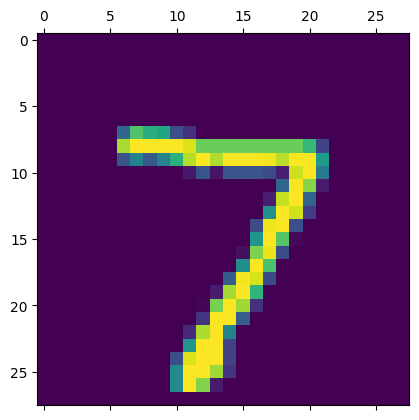

In [21]:
plt.matshow(X_test[0])

In [22]:
np.argmax(y_predicted[0])

7

## convert predicted probabilities into class labels.

np.argmax(i) → finds the index of the highest probability in each row (the predicted digit).

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
y_predicted_labels[:4]

[7, 2, 1, 0]

Compute confusion matrix

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    3,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   8,   10,  908,   19,    8,    4,   13,   10,   50,    2],
       [   3,    0,   11,  932,    1,   24,    3,    9,   21,    6],
       [   1,    1,    5,    2,  925,    0,    9,    5,    9,   25],
       [   9,    3,    2,   33,    9,  783,   11,    7,   30,    5],
       [  13,    3,    8,    2,    7,   14,  908,    1,    2,    0],
       [   1,    7,   23,    6,    9,    1,    0,  952,    1,   28],
       [   7,   12,    5,   20,    9,   29,    8,   13,  865,    6],
       [  11,    8,    1,    9,   36,    8,    0,   22,   11,  903]],
      dtype=int32)>

In [26]:
import seaborn as sns

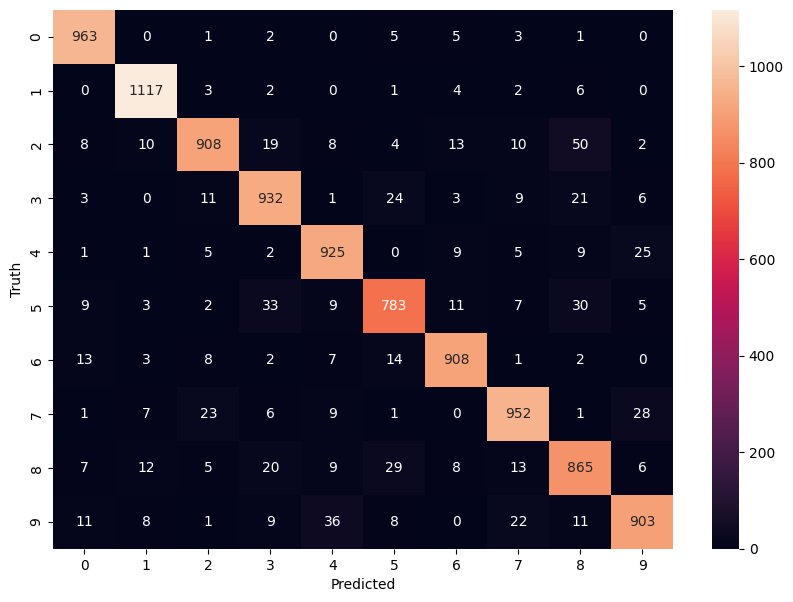

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Using hidden layer

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8722 - loss: 0.4468
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9646 - loss: 0.1248
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9745 - loss: 0.0863
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9804 - loss: 0.0663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9854 - loss: 0.0488
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9887 - loss: 0.0375
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0.0323
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9923 - loss: 0.0248
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9938 - loss: 0.0206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9950 - loss: 0.0173


In [29]:
loss, accuracy = model.evaluate(X_test_flattened, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.1028
Test loss: 0.08890017122030258
Test accuracy: 0.9778000116348267


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


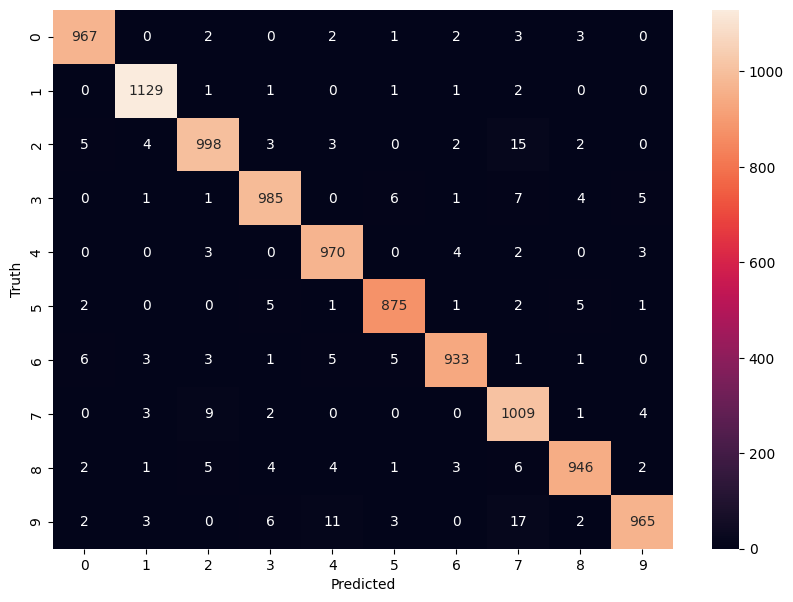

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### using flatten layer so that we do not have to call.reshape on input dataset.

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8689 - loss: 0.4600
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9589 - loss: 0.1362
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9734 - loss: 0.0911
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0670
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0546
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0413
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0356
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9917 - loss: 0.0285
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9929 - loss: 0.0231
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9947 - loss: 0.0187


In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0988
Test loss: 0.08437872678041458
Test accuracy: 0.9764999747276306


different optimizer and activation

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7568 - loss: 0.9638
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8966 - loss: 0.3731
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9091 - loss: 0.3222
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9192 - loss: 0.2874
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9246 - loss: 0.2675
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9307 - loss: 0.2494
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9333 - loss: 0.2378
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9396 - loss: 0.2147
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9409 - loss: 0.2147
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9427 - loss: 0.2019


In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9335 - loss: 0.2222
Test loss: 0.19220730662345886
Test accuracy: 0.9438999891281128


In [35]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_2.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8804 - loss: 0.4216
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9610 - loss: 0.1351
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9726 - loss: 0.0936
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0720
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0603
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0521
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0422
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9908 - loss: 0.0332
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9916 - loss: 0.0299


In [36]:
loss, accuracy = model_2.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9734 - loss: 0.1048
Test loss: 0.08936374634504318
Test accuracy: 0.9775000214576721


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


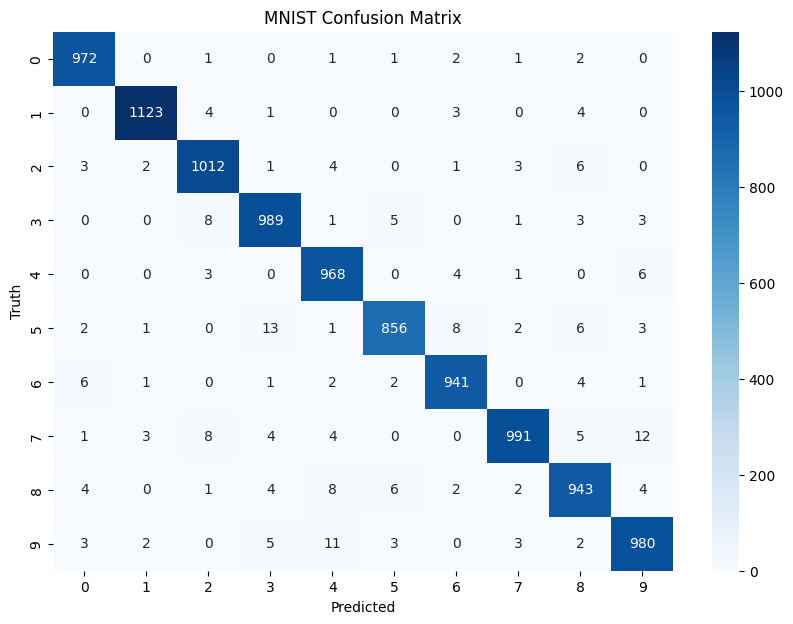

In [37]:
y_pred = model_2.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('MNIST Confusion Matrix')
plt.show()

## compare multiple models with different optimizers, loss functions, and activations by running them in loops and storing their results in a table.

In [38]:
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']
losses = ['sparse_categorical_crossentropy']
activations = ['relu', 'tanh', 'sigmoid']


def build_model(optimizer, loss, activation):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation=activation),
        keras.layers.Dense(10, activation='softmax')  # softmax for multi-class
    ])
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    return model

In [39]:
import pandas as pd

results = []

for opt in optimizers:
    for loss in losses:
        for act in activations:
            print(f"Training model with optimizer={opt}, loss={loss}, activation={act}")
            model = build_model(opt, loss, act)
            history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)
            
            # Evaluate on test set
            loss_val, acc_val = model.evaluate(X_test, y_test, verbose=0)
            
            # Store results
            results.append({
                'Optimizer': opt,
                'Loss': loss,
                'Activation': act,
                'Test Loss': loss_val,
                'Test Accuracy': acc_val
            })

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)
results_df


Training model with optimizer=adam, loss=sparse_categorical_crossentropy, activation=relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with optimizer=adam, loss=sparse_categorical_crossentropy, activation=tanh
Training model with optimizer=adam, loss=sparse_categorical_crossentropy, activation=sigmoid
Training model with optimizer=sgd, loss=sparse_categorical_crossentropy, activation=relu
Training model with optimizer=sgd, loss=sparse_categorical_crossentropy, activation=tanh
Training model with optimizer=sgd, loss=sparse_categorical_crossentropy, activation=sigmoid
Training model with optimizer=rmsprop, loss=sparse_categorical_crossentropy, activation=relu
Training model with optimizer=rmsprop, loss=sparse_categorical_crossentropy, activation=tanh
Training model with optimizer=rmsprop, loss=sparse_categorical_crossentropy, activation=sigmoid
Training model with optimizer=adagrad, loss=sparse_categorical_crossentropy, activation=relu
Training model with optimizer=adagrad, loss=sparse_categorical_crossentropy, activation=tanh
Training model with optimizer=adagrad, loss=sparse_categorical_crossentropy, ac

,Optimizer,Loss,Activation,Test Loss,Test Accuracy
0,adam,sparse_categorical_crossentropy,relu,0.075563,0.9779
6,rmsprop,sparse_categorical_crossentropy,relu,0.088315,0.9757
1,adam,sparse_categorical_crossentropy,tanh,0.080574,0.9756
7,rmsprop,sparse_categorical_crossentropy,tanh,0.083350,0.9740
2,adam,sparse_categorical_crossentropy,sigmoid,0.101084,0.9699
8,rmsprop,sparse_categorical_crossentropy,sigmoid,0.100675,0.9696
3,sgd,sparse_categorical_crossentropy,relu,0.225619,0.9354
4,sgd,sparse_categorical_crossentropy,tanh,0.253601,0.9293
9,adagrad,sparse_categorical_crossentropy,relu,0.380037,0.9025
10,adagrad,sparse_categorical_crossentropy,tanh,0.392017,0.8999


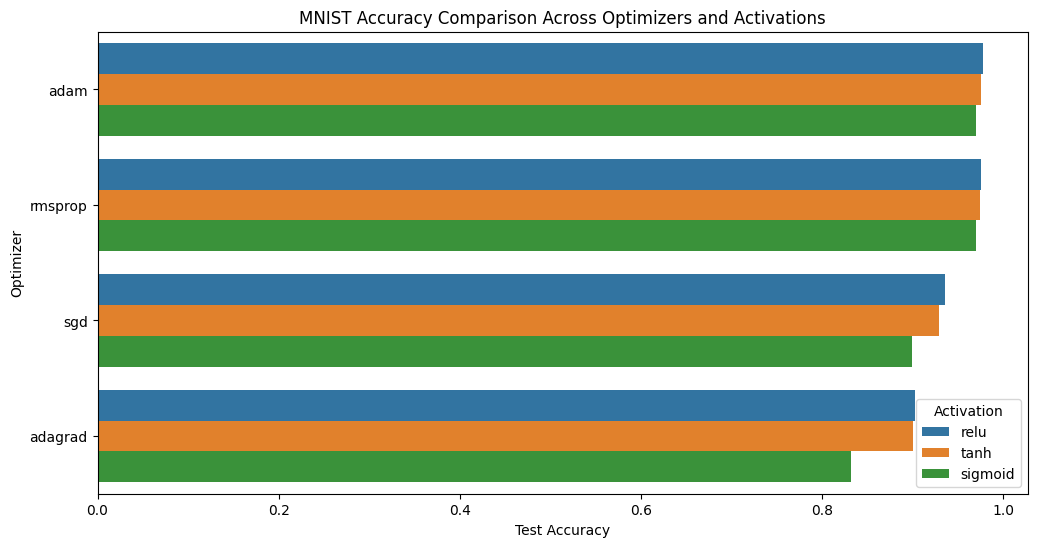

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='Test Accuracy', y='Optimizer', hue='Activation', data=results_df)
plt.title('MNIST Accuracy Comparison Across Optimizers and Activations')
plt.show()